In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.read_csv('experiment_data.csv')

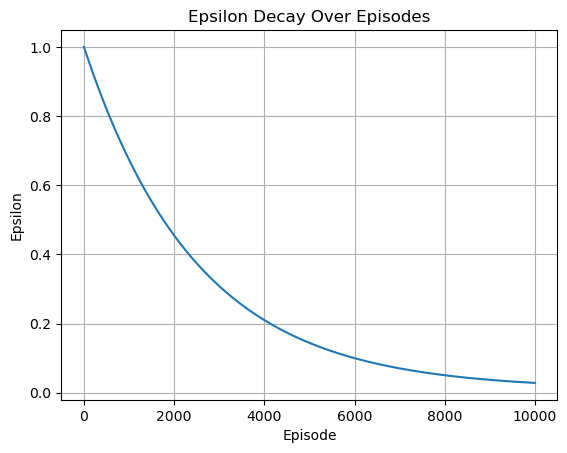

In [50]:
# Logging for epsilon values
epsilon_values = []
epsilon = 1
epsilon_min = 0.01
epsilon_reduction_factor = 0.9996
# Training loop
for i in range(10000):
    # Reset game
    # Log the current epsilon value
    epsilon_values.append(epsilon)

    # Update epsilon (decay)
    epsilon = (epsilon - epsilon_min) * epsilon_reduction_factor + epsilon_min

        
# Plot the decay of epsilon after training
plt.figure('Epsilon Decay')
plt.plot(epsilon_values)
plt.title('Epsilon Decay Over Episodes')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.grid(True)
plt.show()

In [38]:
grouped = df.groupby('DQN_idx')

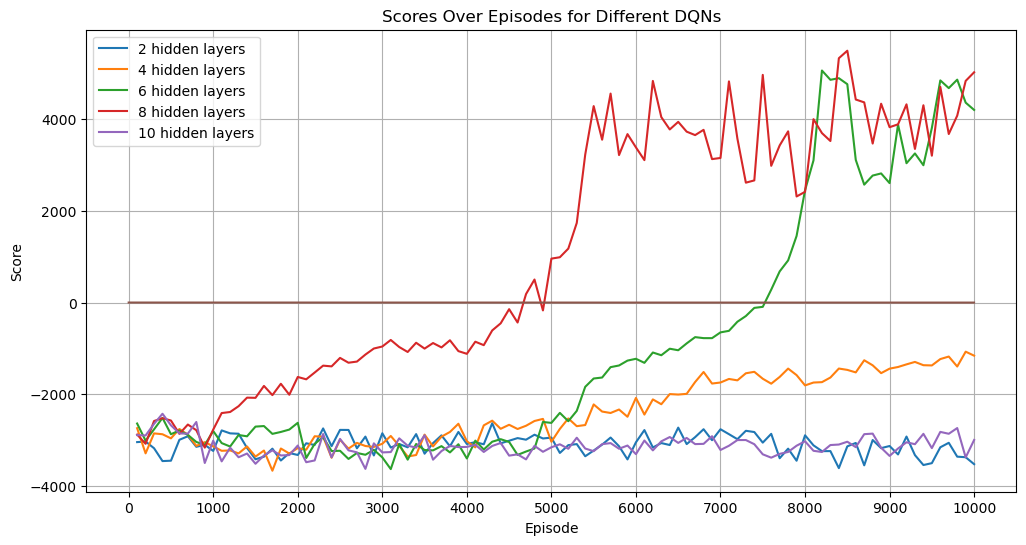

In [ ]:
# Plot scores for each DQN_idx
plt.figure(figsize=(12, 6))
for dqn_idx, group in grouped:
    plt.plot(group['Episode'], group['Score'], label=f'DQN_idx {dqn_idx}')

# Add labels, title, and legend

plt.xticks(np.arange(0,11000, step = 1000))
plt.ylabel('Score')
plt.title('Scores Over Episodes for Different DQNs')
plt.legend(['2 hidden layers','4 hidden layers','6 hidden layers','8 hidden layers','10 hidden layers'])
plt.grid()
plt.show()

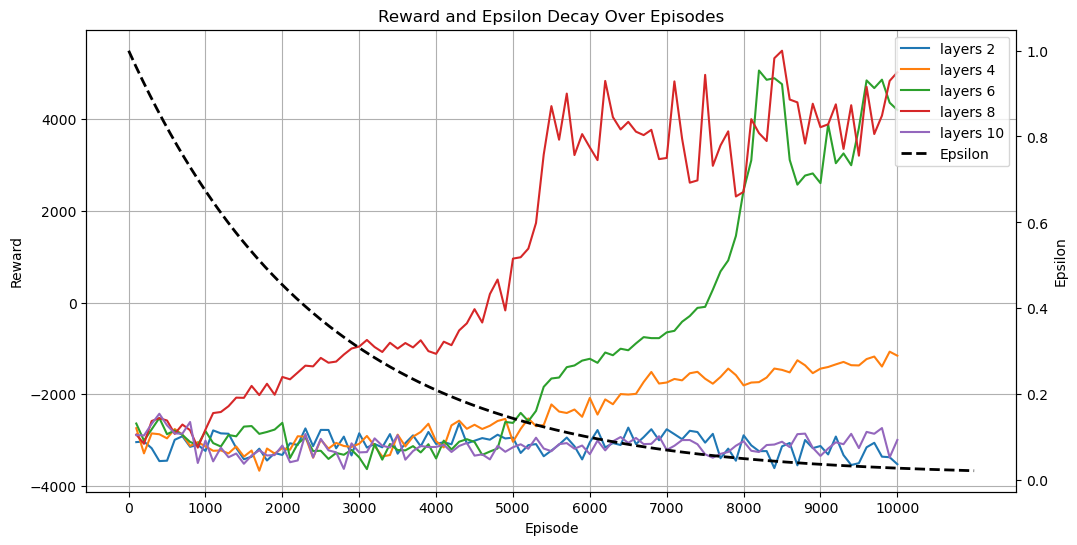

In [55]:

plt.figure(figsize=(12, 6))

# Plot scores on the primary y-axis
for dqn_idx, group in grouped:
    plt.plot(group['Episode'], group['Score'], label=f'layers {dqn_idx * 2 + 2}')

# Create a secondary y-axis for epsilon
epsilon = 1
epsilon_min = 0.01
epsilon_reduction_factor = 0.9996
episodes = np.arange(1, 11000)  # Adjust to match your range
epsilon_values = (epsilon - epsilon_min) * epsilon_reduction_factor ** episodes + epsilon_min

ax1 = plt.gca()  # Get the current axis
ax2 = ax1.twinx()  # Create a twin y-axis sharing the same x-axis
ax2.plot(episodes, epsilon_values, 'k--', label='Epsilon', linewidth=2)

# Customize the primary y-axis (scores)
ax1.set_xlabel('Episode')
ax1.set_ylabel('Reward')
ax1.set_xticks(np.arange(0, 11000, step=1000))
ax1.set_title('Reward and Epsilon Decay Over Episodes')
ax1.grid(True)

# Customize the secondary y-axis (epsilon)
ax2.set_ylabel('Epsilon')
ax2.tick_params(axis='y', colors='black')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

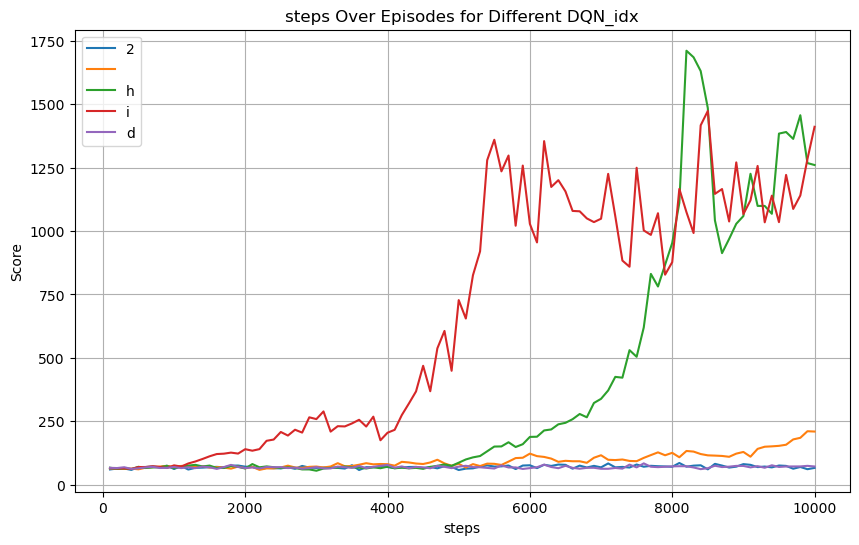

In [40]:
# Plot scores for each DQN_idx
plt.figure(figsize=(10, 6))
for dqn_idx, group in grouped:
    plt.plot(group['Episode'], group['Episode Steps'], label=f'DQN_idx {dqn_idx}')

# Add labels, title, and legend
plt.xlabel('steps')
plt.ylabel('Score')
plt.title('steps Over Episodes for Different DQN_idx')
plt.legend('2 hidden layers')
plt.grid()
plt.show()

In [41]:
# print(df.head())

dqn_idx = df['DQN_idx']
episodes = df['Episode']
scores = df['Score']
episode_steps = df['Episode Steps']

In [42]:
# Filter data for DQN_idx == 0
dqn_0_data = df[df['DQN_idx'] == 0]
print("Data for DQN_idx = 0:")
print(dqn_0_data)

# Filter data for DQN_idx == 1
dqn_1_data = df[df['DQN_idx'] == 1]
print("\nData for DQN_idx = 1:")
print(dqn_1_data)

# Filter data for DQN_idx == 2
dqn_2_data = df[df['DQN_idx'] == 2]
print("\nData for DQN_idx = 2:")
print(dqn_2_data)

Data for DQN_idx = 0:
    DQN_idx  Episode        Score  Episode Steps
0         0      100 -3041.060606      59.898990
1         0      200 -3027.484848      63.595960
2         0      300 -3174.444444      63.636364
3         0      400 -3454.424242      58.262626
4         0      500 -3446.282828      69.111111
..      ...      ...          ...            ...
95        0     9600 -3154.000000      74.000000
96        0     9700 -3056.080808      62.848485
97        0     9800 -3358.111111      69.676768
98        0     9900 -3370.494949      60.949495
99        0    10000 -3522.050505      66.040404

[100 rows x 4 columns]

Data for DQN_idx = 1:
     DQN_idx  Episode        Score  Episode Steps
100        1      100 -2738.131313      64.343434
101        1      200 -3286.090909      63.717172
102        1      300 -2851.080808      62.242424
103        1      400 -2869.777778      63.111111
104        1      500 -2959.040404      60.606061
..       ...      ...          ...         

In [47]:
wins = np.array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])
score_per_step =np.array([0.06236243580337491, 0.05644090305444887, 0.019736842105263157, 0.05122950819672131, 
                          0.04374678332475553, 0.01953125, 0.04185022026431718, 0.03550295857988166, 0.05008839127872716, 
                          0.026455026455026454, 0.03942953020134228, 0.05237215033887862, 0.06938775510204082,
                            0.02094111850209411, 0.05639097744360902, 0.031451612903225803, 0.044854881266490766, 
                            0.0520514390691978, 0.04264927245358756, 0.04942339373970346, 0.02322661644695543, 
                            0.024844720496894408, 0.019736842105263157, 0.022492401215805473, 0.025889967637540454, 
                            0.021399652978600348, 0.021311475409836064, 0.024725274725274724, 0.028051554207733132, 
                            0.020833333333333332])
scores = np.array([85, 85, 3.0, 75.0, 85, 5.0, 38.0, 12.0, 85, 10.0, 47.0, 85, 85, 85, 45.0, 78.0, 85, 85, 85, 60.0, 37, 8.0, 3.0, 37, 16.0, 37, 13.0, 9.0, 37, 1.0])

wins_bol = wins.astype(bool)

scores[wins_bol] = scores[wins_bol] - 5
score_per_step[wins_bol] = (80 / 85) * score_per_step[wins_bol] # new adjusted data 

print(round(score_per_step.mean()),3)
print(round(scores.mean()),3)
print(round((wins.mean()),3))

max(score_per_step)




0 3
45 3
0.467


0.06530612244897958

In [45]:
 # Confidence Interval for Average Mean Score per Timestep

n = 30

std_error = np.sqrt(np.var(score_per_step, ddof=1) / n)
t_value = stats.t.ppf(0.975, df=n - 1)
margin_of_error = t_value * std_error
print (f"Average mean score per time step margin of error: {round(margin_of_error, 3)}")

# Confidence Interval for Average Mean Score

std_error = np.sqrt(np.var(scores, ddof=1) / n)
margin_of_error = t_value * std_error
print (f"Average mean score per time step margin of error: {round(margin_of_error, 3)}")

# Confidence Interval for Win Rate
p_hat = wins.mean()
z_value = stats.norm.ppf(0.975)  # Z-value for 95% confidence
win_rate_margin = z_value * np.sqrt((p_hat * (1 - p_hat)) / 100)
print (f"Average mean score margin of error: {round(win_rate_margin, 3)}")

Average mean score per time step margin of error: 0.005
Average mean score per time step margin of error: 11.829
Average mean score margin of error: 0.098


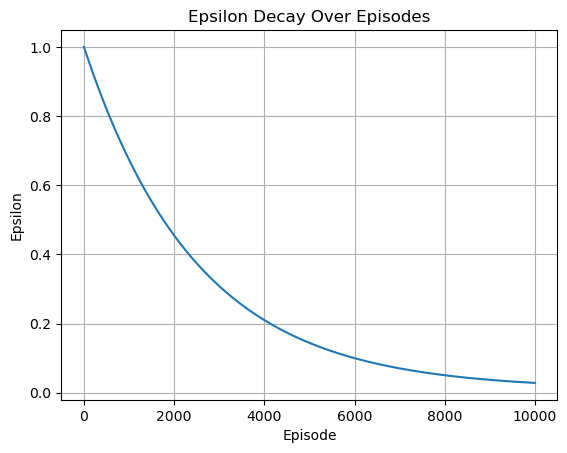